# Simple Neural Network

- Data is time and distance
- Model has only one neuron (y = w*x + b)

## Import libraries

In [1]:
import torch # For Pytorch
import torch.nn as nn # For Neural Networks
import torch.optim as optim # For Optimization Algorithms

print("Torch version:", torch.__version__)

Torch version: 2.9.1


## Data Ingestion and Preparation

In [2]:
# Distances in miles for recent bike deliveries
distances = torch.tensor([[1.0], [2.0], [3.0], [4.0]], 
                         dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], 
                     dtype=torch.float32)
print("This is a simple neural network model to predict delivery times based on distances.")
print("All data is prepared")

This is a simple neural network model to predict delivery times based on distances.
All data is prepared


## Build a Model

- Simple linear equation:

- `Time = Weight * Distance + Bias`

In [3]:
# Create a simple linear regression model
# One input feature (distance) and one output feature (time)
model = nn.Sequential(nn.Linear(1, 1))
print("Model initialized:", model)

Model initialized: Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


In [4]:
# Another way to define the model
# model = nn.Linear(in_features=1, out_features=1)
# print("Model initialized:", model)

## Training 

### Loss Function:

- nn.MSELoss defines the Mean Squared Error loss function.

- It measures how wrong your predictions are. If you predict 25 minutes but the actual delivery took 30 minutes, the loss function quantifies that 5-minute error. The model's goal is to minimize this error.

In [5]:
# Define the Loss function (Mean Squared Error) 
loss_function = nn.MSELoss() # Mean Squared Error Loss, sometime it call criterion

### Optimizer: 
- **optim.SGD** sets up the Stochastic Gradient Descent optimizer. It adjusts your model's weight and bias parameters based on the errors.

- **lr=0.01:** This learning rate controls how big each adjustment step is. Too large and you might overshoot the best values; too small and training takes forever.

In [6]:
# Define the Optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

I'll train for 500 epochs (complete passes through your data). During each epoch, these steps occur:

- **optimizer.zero_grad()**: 

    Clears gradients from the previous round. Without this, PyTorch would accumulate adjustments, which could break the learning process.

- **outputs = model(distances)**: 

    Performs the "forward pass", where the model makes predictions based on the input distances.

- **loss = loss_function(outputs, times)**: 

    Calculates how wrong the predicted outputs are by comparing them to the actual delivery times.

- **loss.backward()**: 

    The "backward pass" (backpropagation) is performed, which calculates exactly how to adjust the weight and bias to reduce the error.

- **optimizer.step()**: 

    Updates the model's parameters using those calculated adjustments.

- The loss is printed every 50 epochs to allow you to track the model's learning progress as the error decreases.

In [7]:
# Training loop
for epoch in range(500):
    
    # Step 1:
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    
    # Step 2:
    # Make predictions (forward pass)
    outputs = model(distances)
    
    # Step 3:
    # Calculate the loss
    loss = loss_function(outputs, times)
    
    # Step 4:
    # Calculate adjustments (backward pass)
    loss.backward()
    
    # Step 5:
    # Update the model's parameters
    optimizer.step()
    
    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 50: Loss = 0.05956271290779114
Epoch 100: Loss = 0.050713781267404556
Epoch 150: Loss = 0.04416057467460632
Epoch 200: Loss = 0.039304763078689575
Epoch 250: Loss = 0.035706907510757446
Epoch 300: Loss = 0.0330413393676281
Epoch 350: Loss = 0.031066320836544037
Epoch 400: Loss = 0.029602909460663795
Epoch 450: Loss = 0.028518563136458397
Epoch 500: Loss = 0.02771516889333725


### Visualizing the Training Results

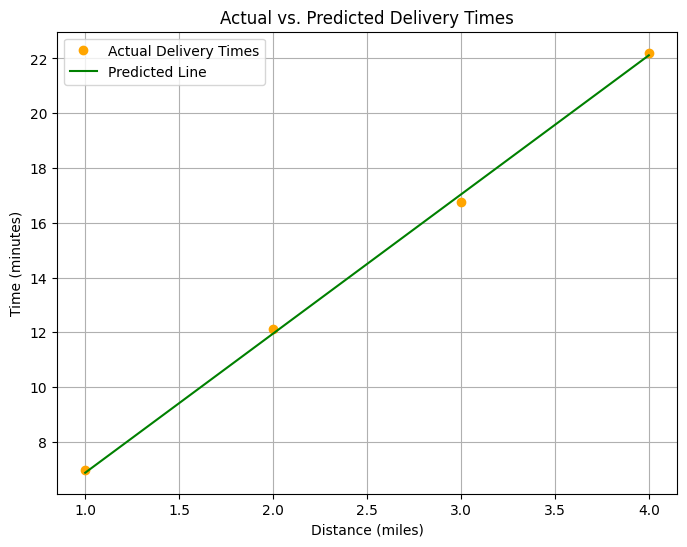

In [8]:
import helper_utils
# Visualize the results
helper_utils.plot_results(model, distances, times)

## Predict Distance

In [9]:
distance_to_predict = 7.0

# Convert the Python variable into a 2D PyTorch tensor that the model expects
distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
print("Distance to predict (tensor):", distance_tensor)
    

Distance to predict (tensor): tensor([[7.]])


The entire prediction process is wrapped in a with **torch.no_grad()** block.

- This tells PyTorch you're not training anymore, just making a prediction. This makes the process faster and more efficient.

A new input tensor (**distance_tensor**) is created using the **distance_to_predict** variable.

- This must be formatted as a 2D tensor ([[7.0]]), as the model expects this specific structure, not a simple number.

In [10]:
# Use the torch.no_grad() context manager for efficient predictions
with torch.no_grad():
    
    # Pass the new data to the trained model to get a prediction
    predicted_time = model(distance_tensor)
    
    # Use .item() to extract the scalar value from the tensor for printing
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

    # Use the scalar value in a conditional statement to make the final decision
    if predicted_time.item() > 30:
        print("\nDecision: Do NOT take the job. You will likely be late.")
    else:
        print("\nDecision: Take the job. You can make it!")

Prediction for a 7.0-mile delivery: 37.4 minutes

Decision: Do NOT take the job. You will likely be late.


## Inspecting the Model's Learning Parameters

In [11]:
# Model has 1 weight and 1 bias
# Access the first (and only) layer in the sequential model
layer = model[0]

# Get weights and bias
weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"Weight: {weights}")
print(f"Bias: {bias}")
print(f"Learned linear equation: TIME = {weights[0][0]:.2f} * DISTANCE + {bias[0]:.2f}")

Weight: [[5.0807753]]
Bias: [1.7930553]
Learned linear equation: TIME = 5.08 * DISTANCE + 1.79


# More Complex Data with NN

In [12]:
# Combined dataset: bikes for short distances, cars for longer ones
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
new_times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

In [13]:
# Use the already-trained linear model to make predictions
with torch.no_grad():
    predictions = model(new_distances)

In [14]:
# Calculate the new loss
new_loss = loss_function(predictions, new_times)
print(f"Loss on new, combined data: {new_loss.item():.2f}")

Loss on new, combined data: 171.98


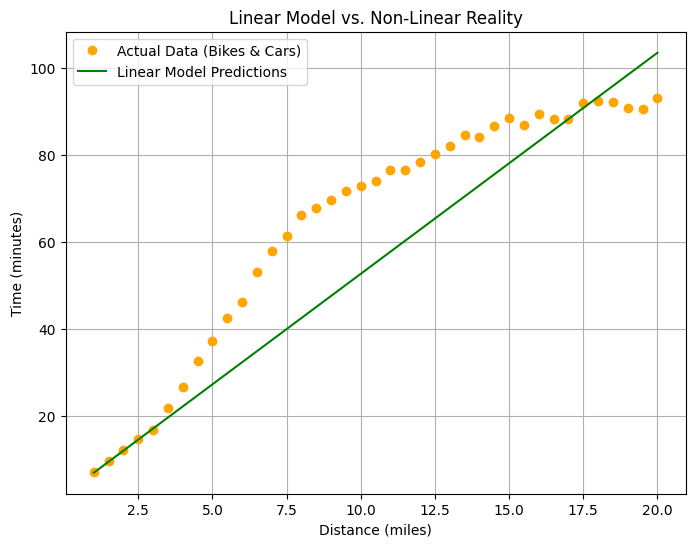

In the plot, the linear model struggles to fit the combined dataset with both bike and car deliveries.


In [15]:
helper_utils.plot_nonlinear_comparison(model, new_distances, new_times)
print("In the plot, the linear model struggles to fit the combined dataset with both bike and car deliveries.")